In [1]:
import pandas as pd
import geopandas as gpd
from pyproj import CRS
from shapely.geometry import Polygon
from shapely.geometry import Point
import rasterio as rio
from rasterio import features
from rasterio.windows import Window
import matplotlib.pyplot as plt
import numpy as np
import pprint as pp
import itertools as it
from tqdm import tqdm
import time

from leaf.deforestation import (
    area,
    to_series,
    closest_index,
)


In [2]:
geo = gpd.read_file('data/foo.gpkg')
asset = pd.read_csv('data/combined_asset_data.csv')

In [54]:
brazil = asset[asset['country'] == 'Brazil']
blip = brazil[(brazil['longitude'] > -60) & (brazil['longitude'] < -58.8) & (brazil['latitude'] > -21) & (brazil['latitude'] < -20)]

from typing import Tuple, Optional

def closest_(gdf: gpd.GeoDataFrame, lat: float, long: float, year: int, verbose: bool = False) -> Tuple[float, int]:

    # TODO: geopandas.sindex.SpatialIndex.nearest
    distances = gdf[gdf['lossyear']==year].distance(Point(lat, long))
    index = distances.idxmin()
    return (distances.iloc[index], index)

proj_3857 = geo.to_crs(epsg=3347) # lambert projection
#foo = closest_(proj_3857, -22, -55, 2020, False)
#print(foo)
#geo.iloc[foo[1]]
temp = brazil.apply(lambda x: closest_(proj_3857, x.latitude, x.longitude, 2020, False), axis=1)
geo.iloc[temp[1]]

KeyboardInterrupt: 

(-22.0, -20.0)

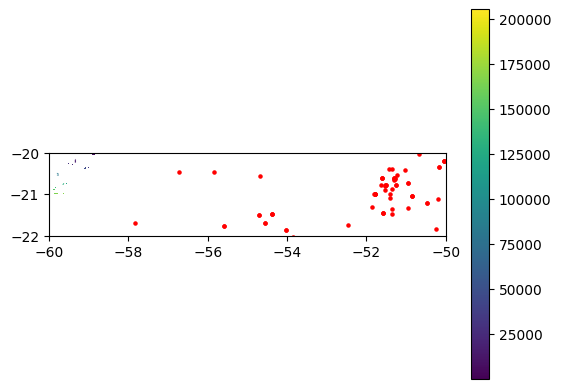

In [52]:
#print(blip.head())
#brazil[[mask]]#.first_valid_index()
geometry=[Point(xy) for xy in zip(brazil["longitude"], brazil["latitude"])]
geodata=gpd.GeoDataFrame(None,crs=geo.crs, geometry=geometry)
base = geo[geo.lossyear==2020].plot(column='group', legend=True)
geodata.plot(ax=base, marker='o', color='red', markersize=5);
base.set_xlim(-60, -50)
base.set_ylim(-22, -20)
